# TP1 : Canny Edges

### Student: Megi Dervishi

Read, understand, and complete the following notebook. You must return the completed notebook, including your answers and illustrations (you may need to add cells to write your code or comments). Please answer the questions along the TD, and not collate all your answers at the end of it.

To execute a notebook, you will need to [install jupyter](http://jupyter.org/install.html). If you are using anaconda (strongly advised) you will have necessary libraries, if not, you may need to install them. If you cannot/don't want to use notebooks, you can return both your python code and a report in pdf. 

Return your work by e-mail using a single file (ipynb or zip) with the format `introvis20_tp1_<yourname>.ipynb`

The first part is about basic image processing in Python, the second guides you in the implementation of the Canny edge detector.

In [55]:
# execute this part to run css style
from IPython.core.display import HTML
def css_styling():
    styles = open("./style.css").read()
    return HTML(styles)
css_styling()

## 1. Playing with images in Python

Here are a set of useful libraries for image processing. You will need to refer to the online documentation of the different libraries to complete the TP.

In [56]:
import sys
sys.executable

'/Users/megidervishi/anaconda3/bin/python'

In [178]:
import numpy as np 
import matplotlib.pyplot as plt 
plt.rcParams['image.cmap'] = 'gray' 
plt.rcParams['image.interpolation'] = 'hanning'
import scipy.ndimage as ndimage

Here is a simple example how to read and display an image.

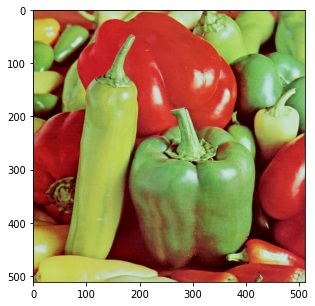

In [58]:
filename = 'legumes.jpg'
I = plt.imread(filename)

# This line is not necessary, but allows you to control the size of the displayed image:
plt.figure(figsize=(5, 5))
plt.imshow(I)
# This line is needed when using several figures
plt.show()

<div markdown=1 class="DoIt"> **1.a.** What is the type of the image `I`? Its size? 
   What is the type of the values it contains? What is their range? 

In [59]:
#Answer 1.a
print("Image type is:", type(I))
print("Size of rgb image:", I.shape[:-1])
print("Type of values:", I.dtype)
print("Range from {} to {}".format(np.min(I),np.max(I)))

Image type is: <class 'numpy.ndarray'>
Size of rgb image: (512, 512)
Type of values: uint8
Range from 0 to 238


Here is a simple function to load an image and crop it according to a bounding box. Make sure you understand every line

In [60]:
def load_image_v0(name, crop_window=None): 
    I = plt.imread(name)
    if crop_window is not None:
        I = I[crop_window[0]:crop_window[1],
              crop_window[2]:crop_window[3]]
    I = I.astype('float') / 255. # Scale the values of the image between 0 and 1 (instead of 0 255)
    return I

<div markdown=1 class="DoIt">**1.b.** Use the function to display the 100 pixels *wide* and 50 pixels *high* bottom left corner of `legumes.jpg`. 

Size of croped image is: (50, 100, 3)


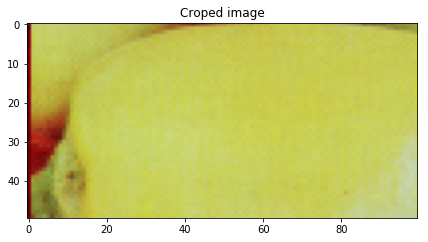

In [61]:
#Answer 1.b
crop_I = load_image_v0(filename,[512-50,512,0,100])
print("Size of croped image is:", crop_I.shape)
plt.figure(figsize=(7,5))
plt.title("Croped image")
plt.imshow(crop_I)
plt.show()

<div markdown=1 class="DoIt">**1.c.** Modify the following code so that `J` is a grid with one *vertical* line every 100 pixels, and one *horizontal* every 20 pixels. What is the difference between the two plots? What is the danger with the `nearest` interpolation?

<div markdown=1 class="Answers"> **1.c** 

The left image is more "blocky" as some of the lines have been removed whereas the image on the right is smother.
Using the `nearest` interpolation can be problamatic if we have continous data as it will display it in a more discrete/"blocky" way.

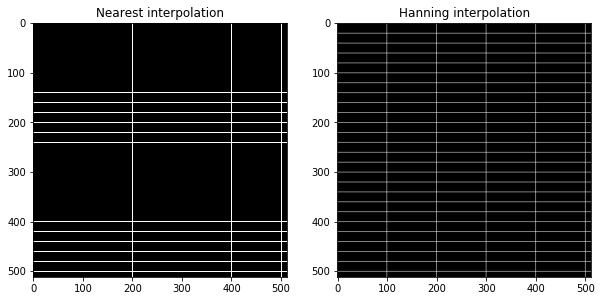

In [62]:
#Answer 1.c continue...

J = np.zeros((512, 512))

for i in range(0,512,20):
    J[i] = 1
for i in range(0,512):
    for j in range(0,512,100):
        J[i][j] = 1
        
#plt.imshow(J)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Nearest interpolation")
plt.imshow(J, interpolation="nearest")
plt.subplot(1, 2, 2)
plt.title("Hanning interpolation")
plt.imshow(J, interpolation="hanning")
plt.show()

In [63]:
# Tips: you can enable matplotlib's notebook interactive mode with the following command
# It allows to zoom in and out the plots easily
%matplotlib notebook

# Having many such plots can be heavy for your computer.
# To revert, use the command
%matplotlib inline

<div markdown=1 class="DoIt"> **1.d.** Modify the following function so that it can load an RGB image and convert it to a grayscale image (*i.e.* converting it from a `H×W×3` array to a `H×W` array) using the formula `L = 0.2989 * R + 0.5870 * G + 0.1140 * B`, where `R`, `G` and `B` are the three color channels of the color image and `L` is the luminance (*i.e.* the grayscale image). Include a test so that your function also works if the input image is grayscale.

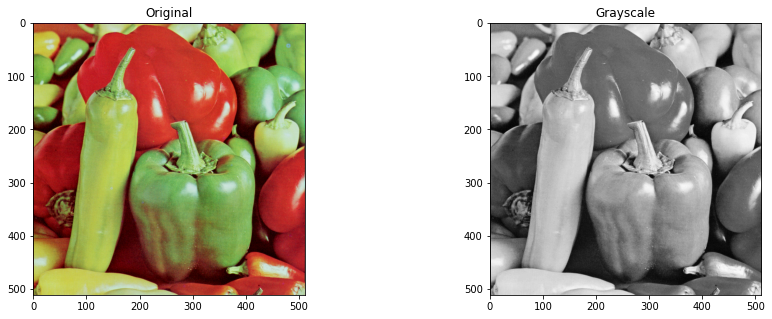

In [204]:
#Answer 1.d

def load_image2(name, crop_window=None):
    I = plt.imread(name)
    if len(I.shape) == 3: #test
        L = 0.2989 * I[:,:,0] + 0.5870 * I[:,:,1] + 0.1140 * I[:,:,2]
    if crop_window is not None:
        L = L[crop_window[0]:crop_window[1],
              crop_window[2]:crop_window[3]]
    L = L.astype('float') / 255.
    return L

#load images
I = plt.imread('legumes.jpg')
L = load_image2('legumes.jpg')

#plot
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(I)
plt.title("Original")
plt.subplot(1,2,2)
plt.imshow(L)
plt.title("Grayscale")
plt.show()

Use your function to load a grayscale version of `legumes.jpg` and save it as a png image.

In [205]:
# !! plt.imsave changes the image's shape for some reason 
# !! so for the rest of tp I will use directly `L` defined again in the next cell
# !! instead of re-reading 'grey.png'

plt.imsave('grey.png', L)
G = plt.imread('grey.png')
print(L.shape, G.shape)

(512, 512) (512, 512, 4)


### For the rest of the TP, use only grayscale images

In [206]:
# We use L.
L = load_image2("legumes.jpg")

<div markdown=1 class="DoIt"> **1.e.** Here is an example of how to convolve an image with a Gaussian. What is the size of the output? What are the border conditions? Replace the border conditions with zero padding and comment on the result

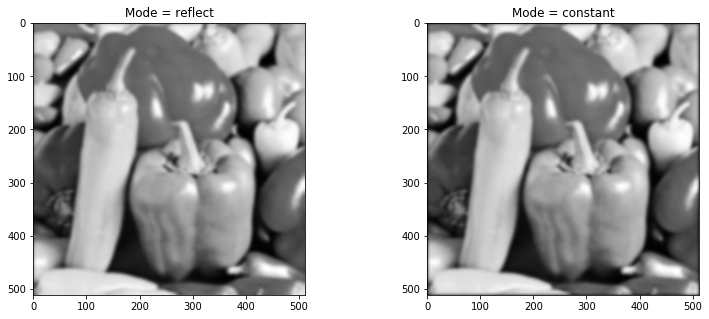

Size of the output is: (512, 512)


In [207]:
#Answer 1.e

plt.figure(figsize = (20,5))
plt.subplot(1,3,1)
plt.title("Mode = reflect")
Ib = ndimage.gaussian_filter(L, sigma=3)
plt.imshow(Ib)
plt.subplot(1,3,2)
plt.title("Mode = constant")
Ib2 = ndimage.gaussian_filter(L, sigma=3, mode="constant")
plt.imshow(Ib2)
plt.show()

print("Size of the output is:", Ib.shape)

<div markdown=1 class="Answers"> **1.e.**

The size of the output image is the same as the size of the input image i.e. (512, 512). The default border condition is "reflect" which means that the input image is extended by reflecting about the edge of the last pixel. To change to zero padding we need to simply change the border condition or `mode` to "constant" which extends the input image by filling all the values beyond the edge with the same constant value, defined by the `cval` parameter. We can observe that the border of the right image is slightly darker. 

<div markdown=1 class="DoIt"> **1.f.** What does the following code do? What is its visual effect on the image?

<div markdown=1 class="Answers">  **1.f.** 

The following code convolves the kernel $k$ with the grayscale image $L$. This convolution is a sharpening filter for the image i.e. it accentuates differences with the local average.

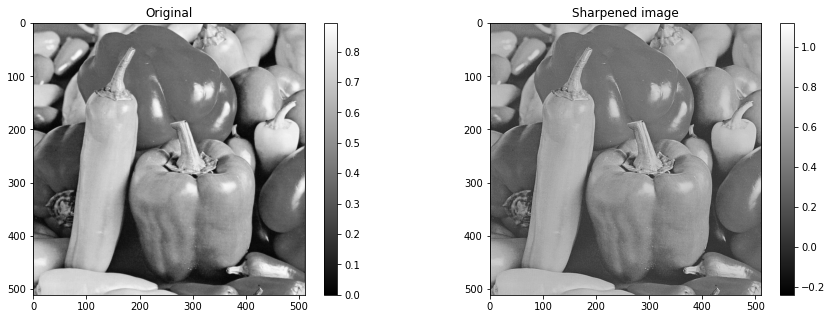

In [210]:
# Answer 1.f

k = np.array([[-1./9, -1./9, -1./9],
              [-1./9, 17./9, -1./9],
              [-1./9, -1./9, -1./9]])
O = ndimage.convolve(L, k)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(L)
plt.title("Original")
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(O)
plt.title("Sharpened image")
plt.colorbar()
plt.show()

<div markdown=1 class="DoIt"> **1.g.** Write a function `compute_gradient` that returns three arrays/images: two containing the input image gradients (along each axis), and another with the gradient norm. 
It should take an optional argument `sigma` that gives the smoothing of the derivative (i.e. the standard deviation of the Gaussian kernel used to blur the image before taking the derivative). 

What is the size of the output compared to the size of the input?

<div markdown=1 class="Answers"> **1.g.** The size of the output and input are the same.

Size of I: (512, 512); Size of Ix: (512, 512); Size of Iy:(512, 512); Size of N:(512, 512)


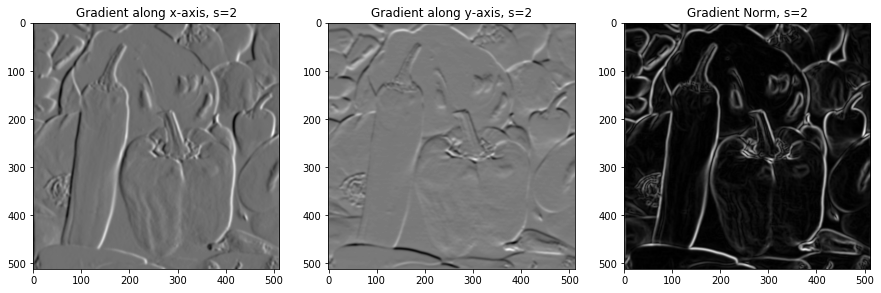

In [69]:
# Answer 1.g
def compute_gradient(I, sigma=0):
    I = ndimage.gaussian_filter(I, sigma)
    x = np.array([[-1,1]])
    y = np.array([[-1],[1]])
    Ix = ndimage.convolve(I, x)
    Iy = ndimage.convolve(I, y)
    norm = np.sqrt(Ix**2 + Iy**2)
    return Ix, Iy, norm

#plot
def plot_img(I, sigma=0,size = (15,10)):
    Ix, Iy, N = compute_gradient(I,sigma)
    plt.figure(figsize = size)
    plt.subplot(1,3,1)
    plt.title("Gradient along x-axis, s={}".format(sigma))
    plt.imshow(Ix)
    plt.subplot(1,3,2)
    plt.imshow(Iy)
    plt.title("Gradient along y-axis, s={}".format(sigma))
    plt.subplot(1,3,3)
    plt.imshow(N)
    plt.title("Gradient Norm, s={}".format(sigma))
    
#size output
Ix, Iy, N = compute_gradient(L,2)
print("Size of I: {}; Size of Ix: {}; Size of Iy:{}; Size of N:{}"
      .format(L.shape,Ix.shape, Iy.shape, N.shape))

#visualize sigma=2
plot_img(L,2)
plt.show()


<div markdown=1 class="DoIt"> **1.h.** Visualize the three images returned by your function for different values of sigma.

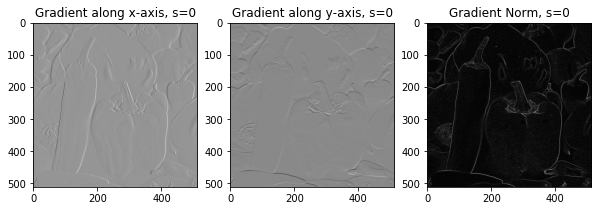

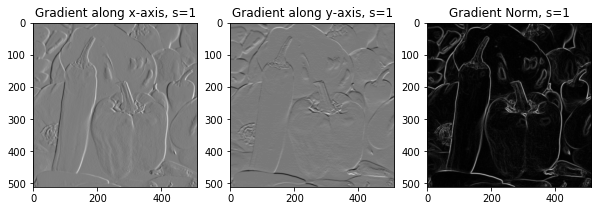

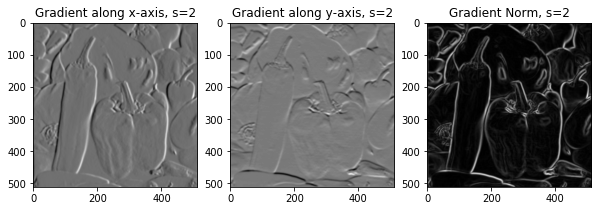

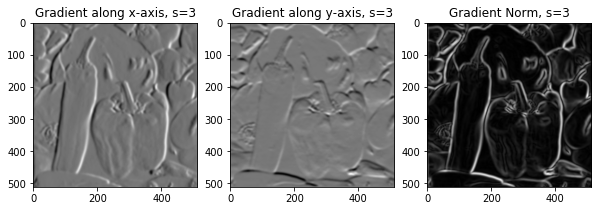

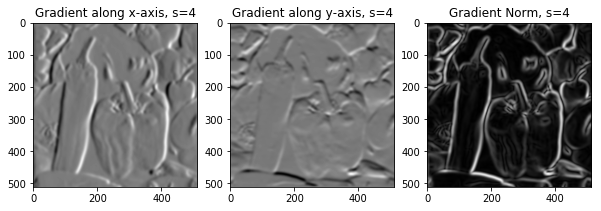

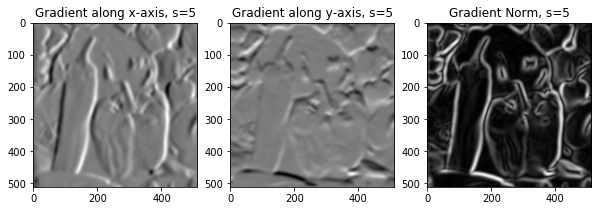

In [70]:
#Answer 1.h

for s in range(6):
    plot_img(L,s, (10,5))
plt.show()

If you had difficulties to do this first part, it might be good to look at a few more examples before writting your own code. You can find many python tutorial for image processing online, for example http://www.scipy-lectures.org/advanced/image_processing/

## 2. Canny edges

<div markdown=1 class="DoIt"> **2.a.** Write a simple function `threshold(G)` that threshold the norm of the gradient and outputs a *binary* image. Discuss the parameters (there are two) and their visual influence of the results.

s =  0.0


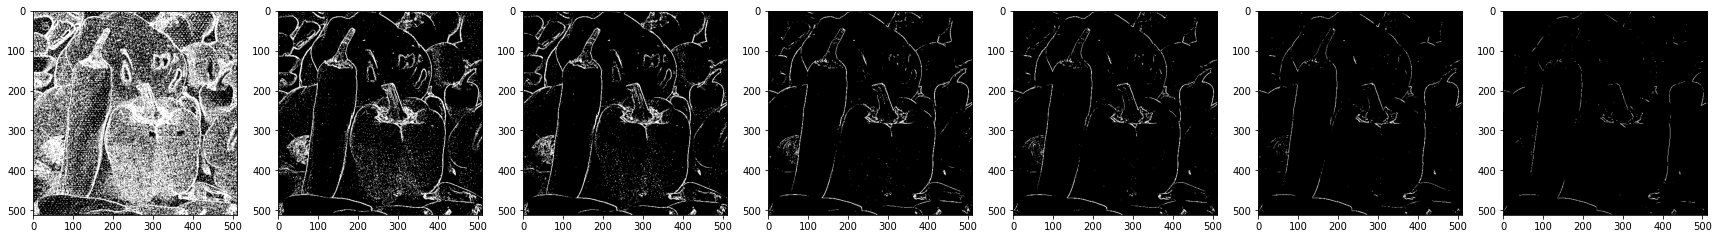

s =  0.5


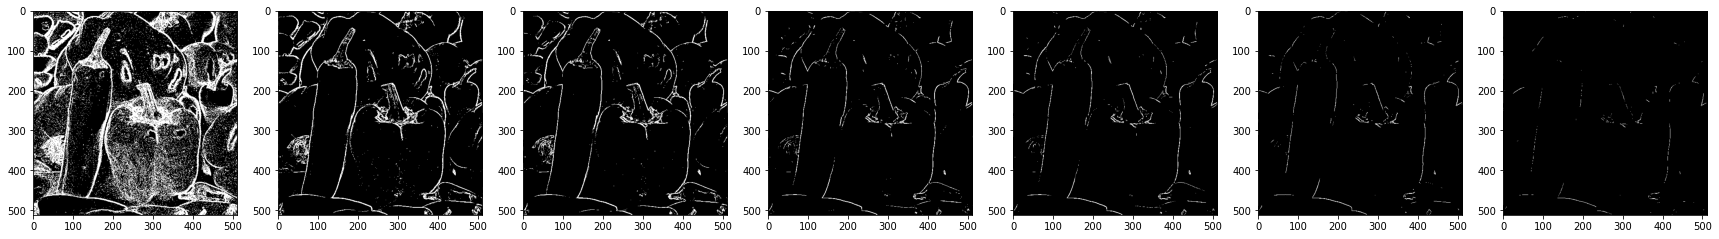

s =  1.0


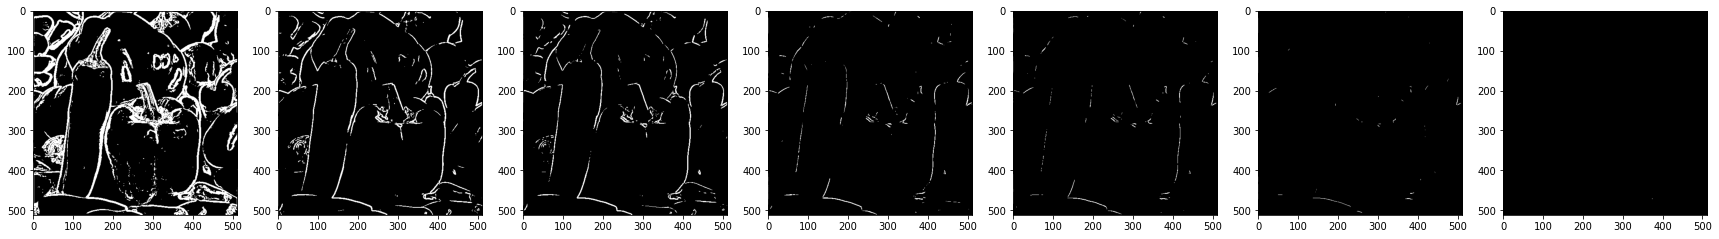

s =  1.5


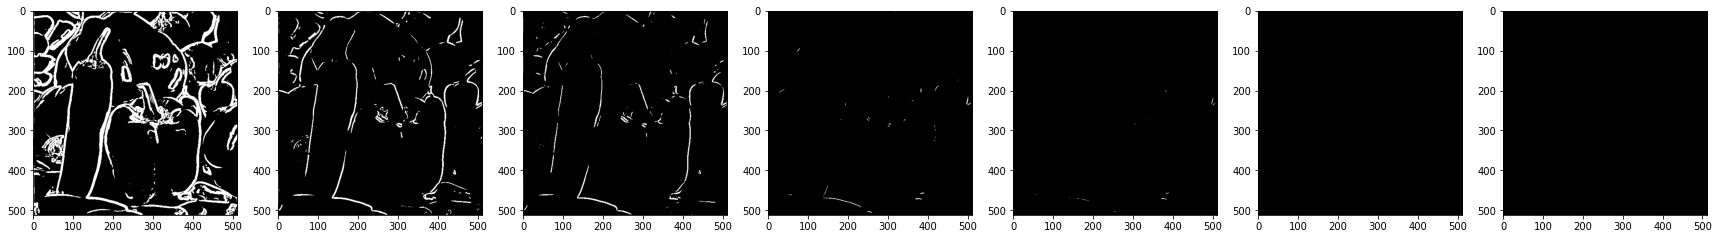

s =  2.0


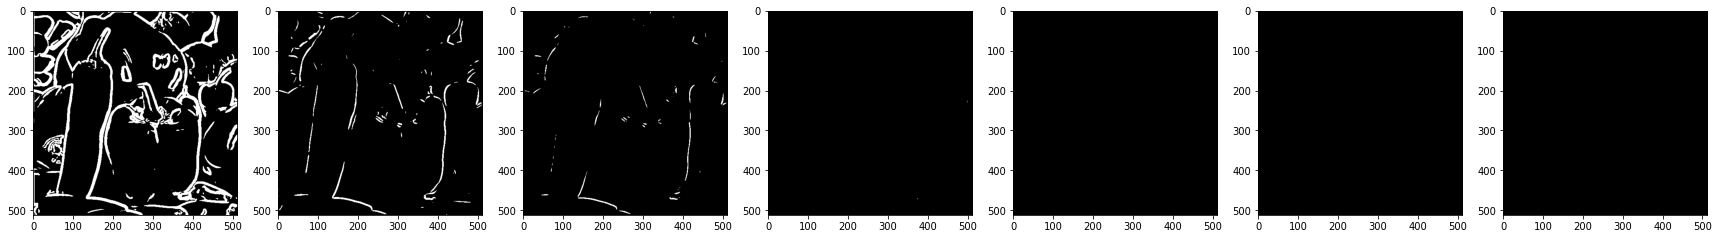

In [211]:
#Answer 2.a
def threshold(G,value): #value of the threshold
    return G >= value

values = [0.025, 0.07, 0.09, 0.14, 0.16 ,0.20, 0.27]

#plot for different sigma and threshold values
for s in np.linspace(0,2,5):
    plt.figure(figsize = (30,5))
    print("s = ", s)
    _,_,G = compute_gradient(L,s)
    for i in range(len(values)):
        plt.subplot(1, 7, i+1) 
        plt.imshow(threshold(G,values[i]))
    plt.show()

<div markdown=1 class="Answers"> **2.a.** 

In the first image we have $\sigma = 0$ which results in the image being very noisy. The threshold for this image is also low which makes the algorithm consider a lot of the characteristics of the image as an edge. 
Keeping the same threshold but increasing $\sigma$, the noise dissappears as the image blurs. Hence the real edges are more appereant. However their thickness/width gets bigger. 

On the other hand if we keep the same $\sigma$ but increase the threshold we observe that less characteristics are considered as edges. At some point the threshold is too high therefore no edges are detected and we can only see a black image. 

<div markdown=1 class="DoIt"> **2.b.** Write a function `nms(gradient)` which takes as input the full gradient and outputs a *binary* image with value 1 only for pixels that correspond to a maximum in the direction of the gradient. 

Display the resulting binary image for a given set of parameters, and comment on how question **1.c.** might affect your visual results.

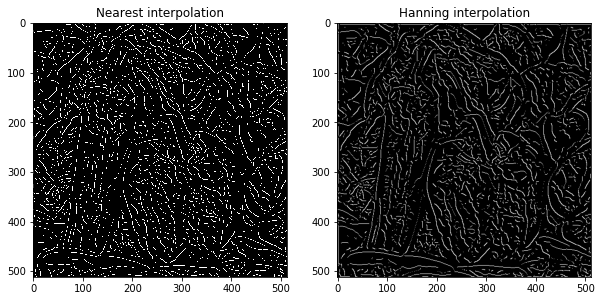

In [146]:
#Answer 2.b

def nms(gradient):
    dx, dy, norm = gradient
    n, m , s2 = dx.shape[0], dx.shape[1], 1/ np.sqrt(2)
    l = np.array([dy , dx, s2*dx + s2*dy, -s2*dx + s2*dy]) #unit vectors * gradient
    discretize_g = np.argmax(l,axis=0) #discretize gradient
    neighbors = np.array([[0,1], [1,0], [1, 1], [-1,1]]) #neighbouring directions
    out = np.zeros((n,m)) #output image
    for i in range(n):
        for j in range(m):
            index = discretize_g[i,j] 
            pi = np.array([i,j])+neighbors[index] #positive direction
            ni = np.array([i,j])-neighbors[index] #negative direction
            
            #take care of boundary conditions (painfully..)
            if (pi >= 0).all() and pi[0] < n and pi[1] < m:
                if (ni >= 0).all() and ni[0] < n and ni[1] < m:
                    if norm[i,j] > norm[pi[0], pi[1]] and norm[i,j] > norm[ni[0],ni[1]]:
                        out[i,j] = 1
                else: 
                    if norm[i,j] > norm[pi[0], pi[1]]:
                        out[i,j] = 1
            else:
                if (ni >= 0).all() and ni[0] < n and ni[1] < m:
                    if norm[i,j] > norm[ni[0],ni[1]]:
                        out[i,j] = 1
                else: 
                    out[i,j] = 1 #by default if no pixels to compare it to 
    return out
                

#compute
grad = compute_gradient(L,3)
out = nms(grad)

#plot
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.title("Nearest interpolation")
plt.imshow(out, interpolation="nearest")
plt.subplot(1,2,2)
plt.title("Hanning interpolation")
plt.imshow(out, interpolation="hanning")
plt.show()

<div markdown=1 class="Answers"> **2.b.** 

Above we display the NMS for the image with $\sigma = 3$ and two interpolations. We observe that the edges on the nearest interpolation appear very discretized whereas in the hanning interpolation are more continuous and smoother edges. The most visualy sensible output is the one given by the hanning interpolation.

<div markdown=1 class="DoIt"> **2.c.** Use `nms` and `threshold` to extract edges with a gradient norm larger than a given threshold.

In [147]:
#Answer 2.c
def extract_edges(gradient, tvalue):
    return nms(gradient) * threshold(gradient[2], tvalue)

<div markdown=1 class="DoIt"> **2.d.** Implement a function computing the full Canny edges by adding a hysteresis thresholding to this processing.

Here is one way to do the hysteresis thresholding: 
  - Keep a list of the edges for which you have to visit neighbours;
  - Initialize the list with the edges corresponding to the most discriminative threshold;
  - Until the list is empty:
    * Take an edge you are sure of (*i.e.* from the list)
    * Check if its neighbours are considered edges using the less discriminative threshold;
      - If they are, add them to the output edges and in the list of edges to visit.

In [212]:
#Answer 2.d

def neighbors(edge, n, seen): #find the neighbours of a given edge
    neighb = np.array([[0,1], [1,0], [1, 1], [-1,1]])
    out = []
    for i in neighb:
        if (edge + i >=0).all() and (edge + i < n).all() and tuple(edge+i) not in seen:
            out.append(edge+i)
        if (edge - i >= 0).all() and (edge - i < n).all() and tuple(edge-i) not in seen:
            out.append(edge-i)
    return out
    
def canny_edge(I, low, high, sigma=0):
    n = len(I)
    gradient = compute_gradient(I, sigma)
    edge_high = extract_edges(gradient, high)
    edge_low = extract_edges(gradient, low)
    l = [(i,j) for i in range(n) for j in range(n) if edge_high[i,j]]
    seen = set(l) #seen stack to avoid loops
    out = edge_high.copy()
    while len(l)> 0:
        edge = np.array(l.pop())
        neigh = neighbors(edge, n, seen)
        for ni in neigh:
            if edge_low[ni[0],ni[1]]:
                out[ni[0], ni[1]] = 1
                l.append(tuple(ni))
            seen.update([tuple(ni)])
    return out



<div markdown=1 class="DoIt"> **2.e.** Use your algorithm with different parameters and on different images and comment on their respective effects.

<div markdown=1 class="Answers"> **2.e**

We can observe from the below images that when $\sigma$ is too low we have too much noise. When it is too high then we lose some of the important edges. The value of the high threshold in the Canny edge algorithm will determine the set of initial edges. Therefore if it is too high then we will lose important edges and if it is too low then we might introduce unwanted ones. The low threshold determines up to where do we extend the initial edges. Similarly if it is too high we might cut the edge too early. On the contrary if it is too low then we can introduce unwanted noise.


s = 0.5


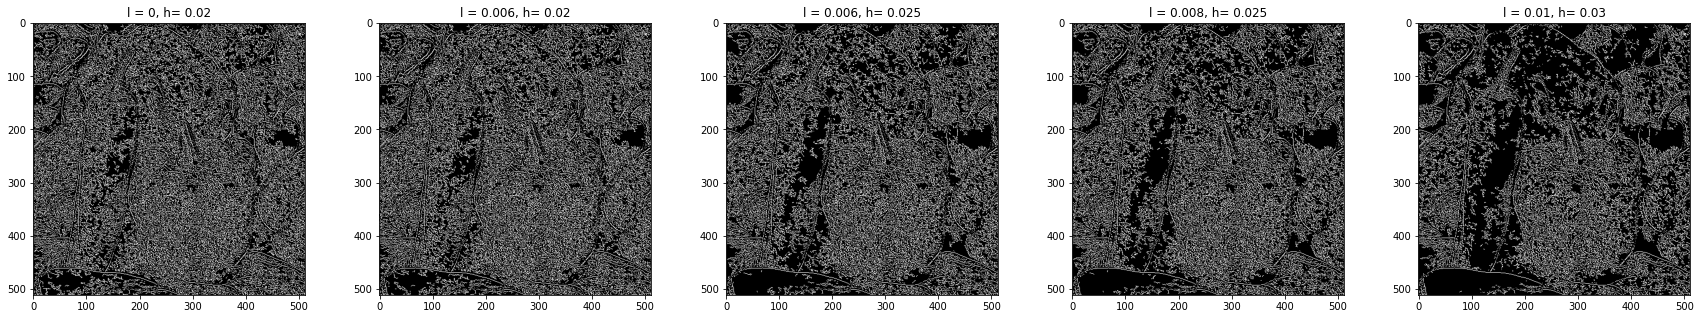

s = 1.0


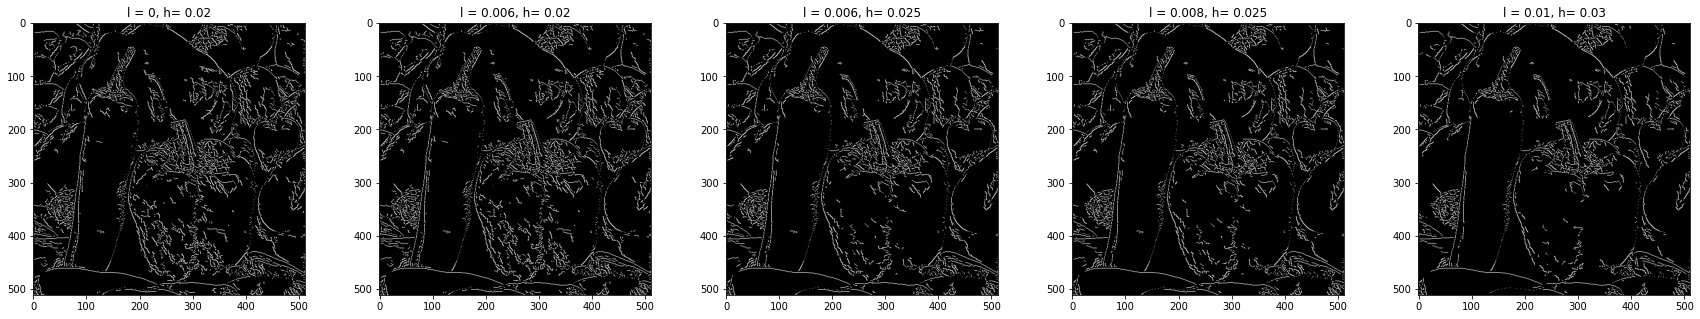

s = 1.5


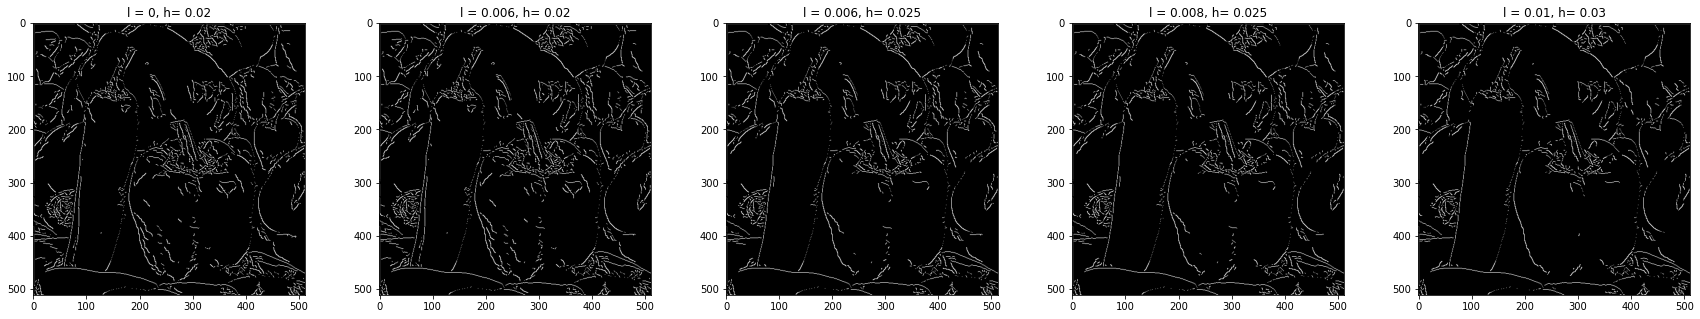

s = 2.0


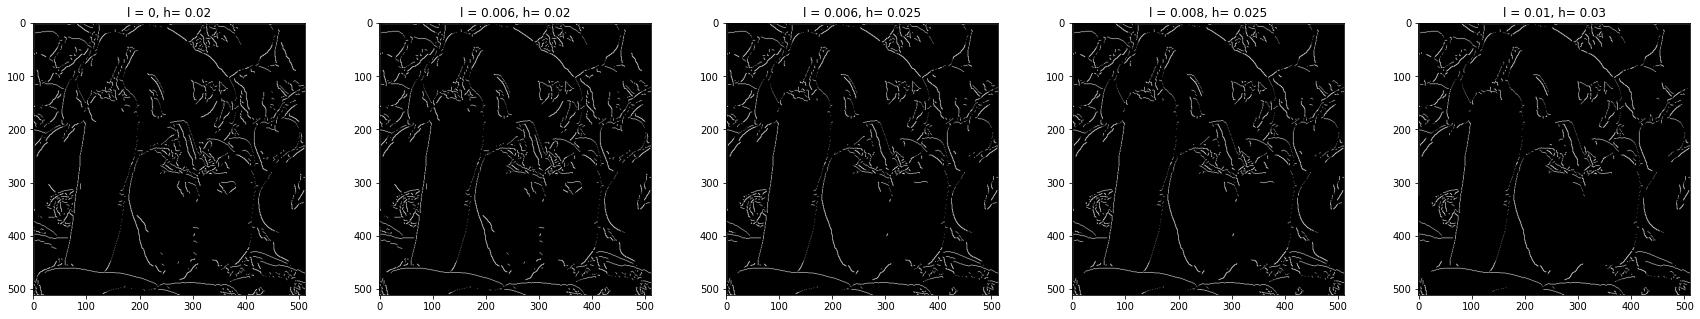

s = 2.5


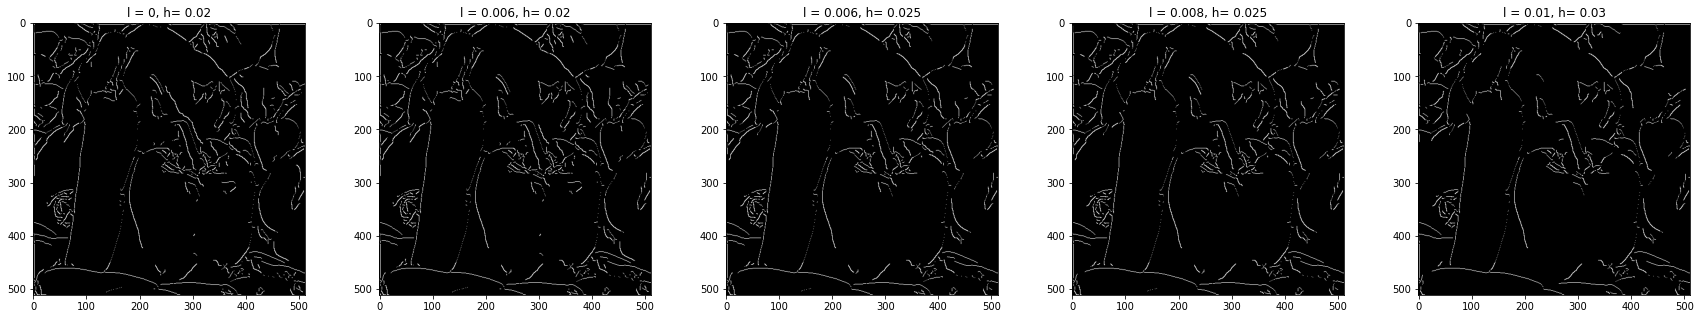

s = 3.0


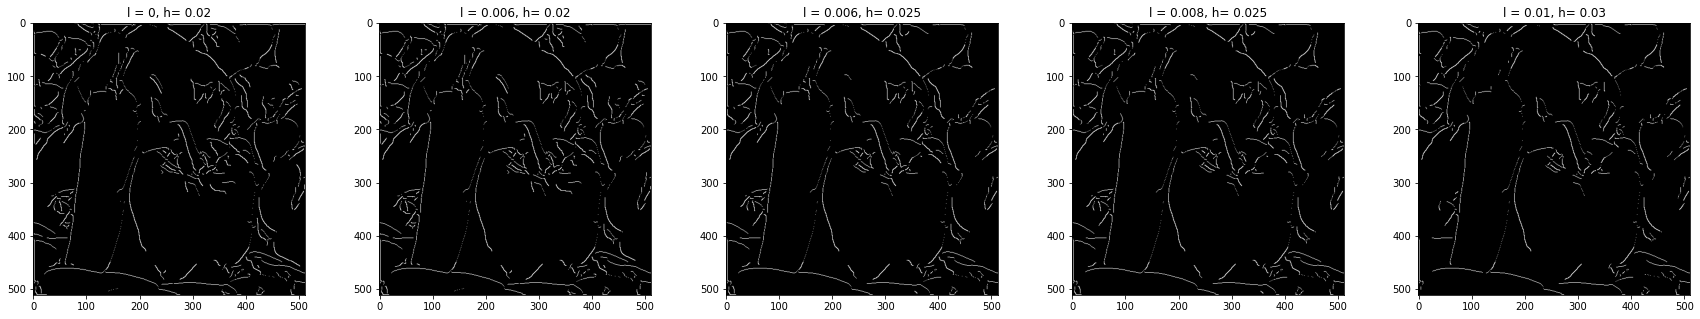

In [202]:
# Answer 2.e 

"""
#avoid heavy computations
plt.title("s = 3, l = 0.006, h= 0.025")
ce = canny_edge(L, 0.006, 0.025, 3)
plt.imshow(ce)
plt.show()
"""

#heavy computations
sigmas = np.linspace(0.5,3,6)
thv = [(0, 0.02), (0.006, 0.02), (0.006, 0.025), (0.008, 0.025), (0.01, 0.03)]
for s in sigmas:
    print("s =", s)
    plt.figure(figsize = (30,5))
    for i,t in enumerate(thv):
        plt.subplot(1,len(thv),i+1)
        plt.title("l = {}, h= {}".format(t[0], t[1]), fontsize = 12)
        ce = canny_edge(L, t[0], t[1], s)
        plt.imshow(ce)
    plt.show()

Size of image I2:  (300, 405)


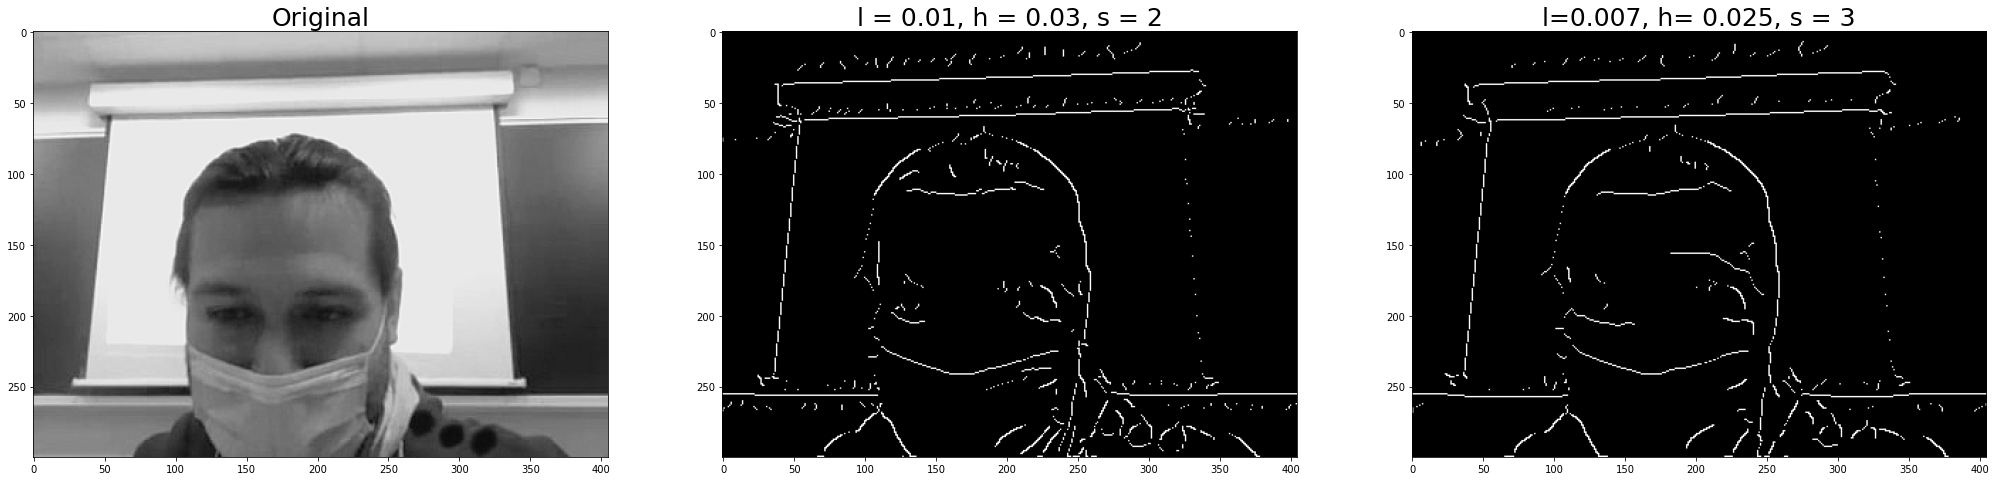

In [203]:
# other image 

I2 = load_image2('img1.jpg')
I2 = ndimage.convolve(I2, k)
print("Size of image I2: ", I2.shape)
ce2 = canny_edge(I2, 0.01, 0.03, 2)
ce3 = canny_edge(I2, 0.007, 0.025, 3)
plt.figure(figsize = (35,10))
plt.subplot(1,3,1)
plt.imshow(I2)
plt.title("Original", fontsize = 25)
plt.subplot(1,3,2)
plt.imshow(ce2)
plt.title("l = 0.01, h = 0.03, s = 2", fontsize = 25)
plt.subplot(1,3,3)
plt.title("l=0.007, h= 0.025, s = 3", fontsize = 25)
plt.imshow(ce3)
plt.show()
